# 第3章

In [1]:
import pandas as pd
import numpy as np
from scipy import stats, signal, special
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import warnings
from IPython.display import Markdown
import functools
from mylib.plot import contourplot

sns.set_theme()
warnings.simplefilter("ignore")

## 3.1 標本調査

- サンプルサイズ:
    - $N=100$
- 変数$Y$
    - $i$番目の人が政策を支持しているとき:  $Y_i = 1$
    - $i$番目の人が政策を支持していないとき:    $Y_i = 0$

### a

#### $Pr(Y_1 = y_1, \cdots, Y_{100} = y_{100})$ を簡単な形で表す

$Y_1 , \cdots, Y_{100}$ が条件付き独立ということから、

$$
Pr(Y_1 = y_1, \cdots, Y_{100} = y_{100})
= \prod _{i=1} ^{100} Pr(Y_{i} = y_{i} | \theta)
$$

と書ける。

期待値 $\theta$ をもつ二値確率変数の分布関数は

$$
Pr(Y_{i} = y_{i}|\theta)
= \theta^{y_i} (1 - \theta) ^{1 - y_i}
$$

と表すことができる。（これはベルヌーイ分布である）

以上より、

$$
\begin{aligned}
Pr(Y_1 = y_1, \cdots, Y_{100} = y_{100})
&= \prod _{i=1} ^{100} \theta^{y_i} (1 - \theta) ^{1 - y_i} \\
&= \theta^{\sum _{i} y_i} (1 - \theta) ^{100 - \sum _{i} y_i}
\end{aligned}
$$

と表すことができる。
（これは互いに独立で同一のパラメータのベルヌーイ分布に従う100個の確率変数の同時確率である）

#### $Pr(\sum _{i} Y_{i} = y | \theta)$ を求める

$Y = \sum _{i} Y_{i}$ とすると、 確率変数 $Y$ はパラメータ $(n=100, \theta)$ を持つ二項分布に従う。
よって、確率分布は

$$
Pr(\sum _{i} Y_{i} = y | \theta)
= \binom{100}{y}\theta^{y}(1 - \theta)^{100 - y}
$$

となる。

### b

In [2]:
Y = 57
N = 100

df_3_1 = pd.DataFrame()

df_3_1["theta"] = np.linspace(0.0, 1.0, 11)

# 二項分布の確率関数から確率を計算
df_3_1["likelifood"] = df_3_1["theta"].apply(
    lambda theta: stats.binom.pmf(k=Y, n=N, p=theta)
)

df_3_1

,theta,likelifood
0,0.0,0.000000e+00
1,0.1,4.107157e-31
2,0.2,3.738459e-16
3,0.3,1.306895e-08
4,0.4,2.285792e-04
5,0.5,3.006864e-02
6,0.6,6.672895e-02
7,0.7,1.853172e-03
8,0.8,1.003535e-07
9,0.9,9.395858e-18


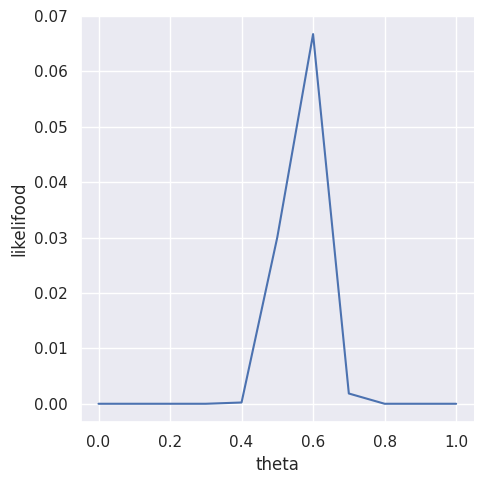

In [3]:
_ = sns.relplot(
    df_3_1,
    x="theta",
    y="likelifood",
    kind="line",
)

### c

ベイズルールを用いると

$$
p\left(\theta | \sum _{i=1}^{100} Y_{i} = 57 \right)
=
\frac{
    p(\sum _{i=1}^{100} Y_{i} = 57 | \theta)p(\theta)
}{
    p(\sum _{i=1}^{100} Y_{i} = 57)
}
$$

と書ける。

ここで、$\theta$ について事前情報がないということから、

$$
\begin{aligned}
p(\theta) &= \frac{1}{11} \\
p \left(\sum _{i=1}^{100} Y_{i} = 57 \right) &=  \sum _{\theta} p \left(\sum _{i=1}^{100} Y_{i} = 57 | \theta \right) \times \frac{1}{11}
\end{aligned}
$$

である。

In [4]:
# thetaの事前分布
# すべての値に対して 1 / 11
prior_theta = 1 / 11

# 周辺尤度
marginal_likelihood = df_3_1["likelifood"].sum() * prior_theta
print(f"{marginal_likelihood=}")

df_3_1["posterior"] = df_3_1["likelifood"].mul(prior_theta).div(marginal_likelihood)

df_3_1

marginal_likelihood=0.008989041496797676


,theta,likelifood,posterior
0,0.0,0.000000e+00,0.000000e+00
1,0.1,4.107157e-31,4.153701e-30
2,0.2,3.738459e-16,3.780824e-15
3,0.3,1.306895e-08,1.321705e-07
4,0.4,2.285792e-04,2.311695e-03
5,0.5,3.006864e-02,3.040939e-01
6,0.6,6.672895e-02,6.748515e-01
7,0.7,1.853172e-03,1.874172e-02
8,0.8,1.003535e-07,1.014907e-06
9,0.9,9.395858e-18,9.502335e-17


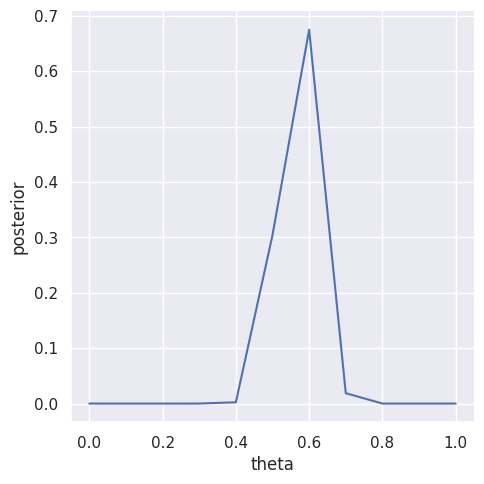

In [5]:
_ = sns.relplot(
    df_3_1,
    x="theta",
    y="posterior",
    kind="line",
)

### d

In [6]:
df_3_1_continuous = pd.DataFrame()

n_points = 200
df_3_1_continuous["theta"] = np.linspace(0, 1, n_points)

df_3_1_continuous["likelihood"] = df_3_1_continuous["theta"].apply(
    lambda theta: stats.binom.pmf(k=Y, n=N, p=theta)
)

df_3_1_continuous.head()

,theta,likelihood
0,0.000000,0.000000e+00
1,0.005025,2.834059e-103
2,0.010050,3.285211e-86
3,0.015075,2.875599e-76
4,0.020101,3.052907e-69


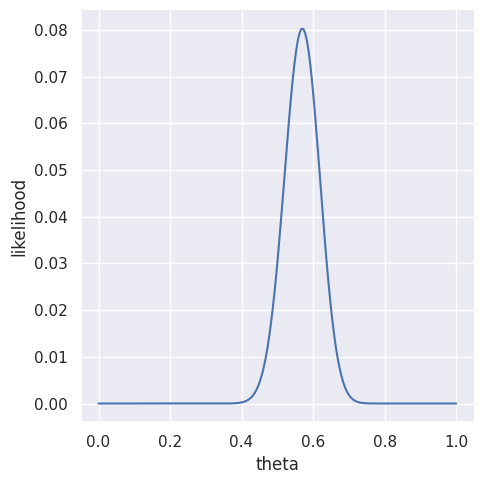

In [7]:
_ = sns.relplot(
    df_3_1_continuous,
    x="theta",
    y="likelihood",
    kind="line",
)

### e

In [8]:
df_3_1_posterior = pd.DataFrame()

n_points = 200
df_3_1_posterior["theta"] = np.linspace(0, 1, n_points)

a = 1 + Y
b = 1 + N - Y
df_3_1_posterior["posterior"] = df_3_1_posterior["theta"].apply(
    lambda theta: stats.beta.pdf(x=theta, a=a, b=b)
)

df_3_1_posterior.head()

,theta,posterior
0,0.000000,0.000000e+00
1,0.005025,2.862400e-101
2,0.010050,3.318063e-84
3,0.015075,2.904355e-74
4,0.020101,3.083436e-67


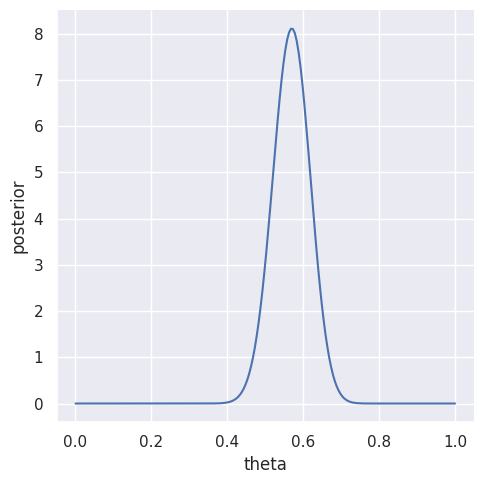

In [9]:
_ = sns.relplot(
    df_3_1_posterior,
    x="theta",
    y="posterior",
    kind="line",
)

- b, cの図は同じ形でスケールだけ異なる
- d, eの図は同じ形でスケールだけ異なる

## 3.2 感度分析

In [10]:
# theta0 と n0 の組み合わせを作る
n_points = 50
theta0 = np.linspace(0.1, 0.9, n_points)
n0 = 2 ** np.linspace(0, 5, n_points)

# データフレームにする
df_3_2 = pd.merge(
    pd.Series(theta0, name="theta0"),
    pd.Series(n0, name="n0"),
    how="cross",
)

# a,b を計算する
df_3_2 = df_3_2.assign(
    a=df_3_2["theta0"].mul(df_3_2["n0"]),
    b=df_3_2["theta0"].rsub(1).mul(df_3_2["n0"]),
)

with pd.option_context("display.max_columns", 20):
    display(df_3_2.round(1).T)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
theta0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
n0,1.0,1.1,1.2,1.2,1.3,1.4,1.5,1.6,1.8,1.9,...,16.9,18.2,19.5,20.9,22.5,24.1,25.9,27.8,29.8,32.0
a,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,...,15.2,16.4,17.6,18.8,20.2,21.7,23.3,25.0,26.8,28.8
b,0.9,1.0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,...,1.7,1.8,2.0,2.1,2.2,2.4,2.6,2.8,3.0,3.2


In [11]:
def probability_3_2(a: float, b: float) -> float:
    # 事後分布のa, b
    a_post = a + Y
    b_post = b + N - Y

    # theta > 0.5 の確率
    thresh = 0.5
    proba = 1 - stats.beta.cdf(x=thresh, a=a_post, b=b_post)

    return proba

In [12]:
df_3_2["probability"] = df_3_2.apply(
    lambda row: probability_3_2(a=row["a"], b=row["b"]),
    axis=1,
)

with pd.option_context("display.max_columns", 20):
    display(df_3_2.T.round(2))

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
theta0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,...,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.9
n0,1.00,1.07,1.15,1.24,1.33,1.42,1.53,1.64,1.76,1.89,...,16.93,18.17,19.50,20.93,22.47,24.11,25.88,27.78,29.81,32.0
a,0.10,0.11,0.12,0.12,0.13,0.14,0.15,0.16,0.18,0.19,...,15.24,16.36,17.55,18.84,20.22,21.70,23.29,25.00,26.83,28.8
b,0.90,0.97,1.04,1.11,1.19,1.28,1.38,1.48,1.58,1.70,...,1.69,1.82,1.95,2.09,2.25,2.41,2.59,2.78,2.98,3.2
probability,0.91,0.91,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.89,...,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


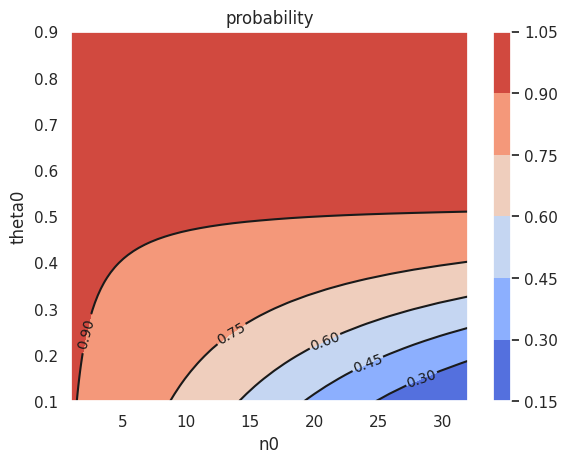

In [13]:
contourplot(
    df_3_2,
    "n0",
    "theta0",
    "probability",
)

等高線プロットから、以下のことがわかる。

- $\theta_0$ が大きい(だいたい0.3以上) または $n_0$ が小さい(だいたい15以下) の領域では $Pr(\theta > 0.5 | \sum Y_i = 57)$ は大きくなる。
- $\theta_0$ が小さい(だいたい0.3以下) かつ $n_0$ が大きい(だいたい15以上) の領域では $Pr(\theta > 0.5 | \sum Y_i = 57)$ は小さくなる。

以上から、次のような解釈をする。

- 事前の $\theta_0$ が0.3以上の場合は $\theta > 0.5$ を信用してよい。
- 事前の $\theta_0$ が0.3より小さい場合
    - 事前の信念の強さ $n_0$ が15以下のときは $\theta > 0.5$ を信用してよい。
    - 事前の信念の強さ $n_0$ が15より大きいときは $\theta > 0.5$ を信用できない。

## 3.3 腫瘍数

In [14]:
y_A = [12, 9, 12, 14, 13, 13, 15, 8, 15, 6]
y_B = [11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7]

In [15]:
print("A系統のデータの要約統計量")
print(stats.describe(y_A))
print()
print("B系統のデータの要約統計量")
print(stats.describe(y_B))

A系統のデータの要約統計量
DescribeResult(nobs=10, minmax=(6, 15), mean=11.7, variance=9.344444444444445, skewness=-0.6848989298454216, kurtosis=-0.784392624713516)

B系統のデータの要約統計量
DescribeResult(nobs=13, minmax=(6, 11), mean=8.692307692307692, variance=2.3974358974358974, skewness=-0.024886573315266888, kurtosis=-0.9230890217049392)


### a

In [16]:
def summarise_poisson_gamma(a, b, y, print_results=False):
    # 結果を保存する辞書
    results_dict = {}

    # 事後分布のパラメータ
    a_posterior = a + np.sum(y)
    b_posterior = b + len(y)
    results_dict["a_posterior"] = a_posterior
    results_dict["b_posterior"] = b_posterior

    # 事後平均
    posterior_mean = a_posterior / b_posterior
    results_dict["posterior_mean"] = posterior_mean

    # 事後分散
    posterior_var = a_posterior / (b_posterior**2)
    results_dict["posterior_var"] = posterior_var

    # 信用区間
    credible_interval = stats.gamma.interval(
        confidence=0.95, a=a_posterior, scale=1 / b_posterior
    )
    results_dict["credible_interval"] = credible_interval

    if print_results:
        print(
            "Posterior Distributiion:\n",
            f"\tgamma({a_posterior}, {b_posterior})",
            end="\n",
        )
        print("Posterior Mean:\n", f"\t {posterior_mean}", end="\n")
        print("Posterior Variance:\n", f"\t {posterior_var}", end="\n")
        print("95% Credible Interval:\n", f"\t {credible_interval}", end="\n")

    return results_dict

In [17]:
results_A = summarise_poisson_gamma(
    a=120,
    b=10,
    y=y_A,
    print_results=True,
)

Posterior Distributiion:
 	gamma(237, 20)
Posterior Mean:
 	 11.85
Posterior Variance:
 	 0.5925
95% Credible Interval:
 	 (10.389238190941795, 13.405448325642006)


In [18]:
results_B = summarise_poisson_gamma(
    a=12,
    b=1,
    y=y_B,
    print_results=True,
)

Posterior Distributiion:
 	gamma(125, 14)
Posterior Mean:
 	 8.928571428571429
Posterior Variance:
 	 0.6377551020408163
95% Credible Interval:
 	 (7.432064219464302, 10.560308149242363)


### b

In [19]:
df_3_3 = pd.DataFrame()

df_3_3["n0"] = np.arange(1, 50 + 1)
df_3_3["a"] = df_3_3["n0"].mul(12)
df_3_3["b"] = df_3_3["n0"]

df_3_3["posterior_mean"] = df_3_3.apply(
    lambda row: summarise_poisson_gamma(a=row["a"], b=row["b"], y=y_B)[
        "posterior_mean"
    ],
    axis=1,
)

df_3_3.head()

,n0,a,b,posterior_mean
0,1,12,1,8.928571
1,2,24,2,9.133333
2,3,36,3,9.312500
3,4,48,4,9.470588
4,5,60,5,9.611111


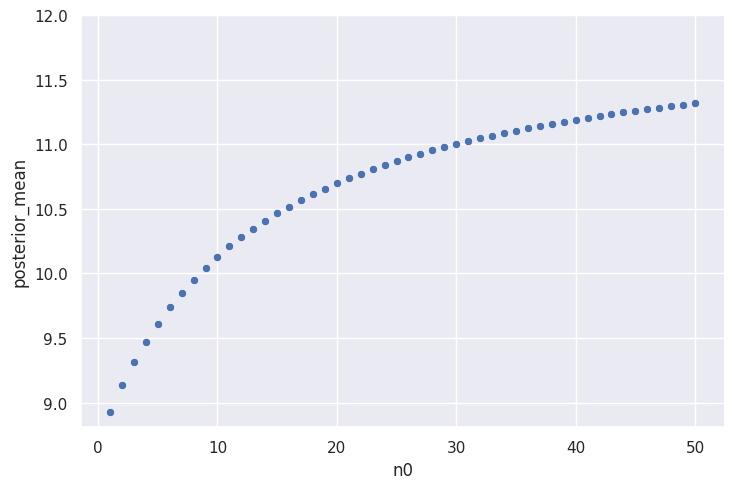

In [20]:
_ = sns.relplot(
    df_3_3,
    x="n0",
    y="posterior_mean",
    aspect=1.5,
).set(ylim=(None, 12.0))

$\theta_B$ の事後期待値が $\theta_A$ の事後期待値 (= 11.85) に近い値をとるためには、大きい $n_0$ をとる必要がある。
つまり、$\theta_B = 12$ であるという強い信念が必要となる。

### c

TBW

## 3.4 ベータ事前分布の混合

In [21]:
# 36カ月以内に投獄から解放された人数
n = 43

# 再犯者の人数
y = 15

### a

それぞれの分布は

$$
\begin{aligned}
p(\theta) &= dbeta(\theta, a=2, b=8) \\
p(y|\theta) &= dbinom(y, n, \theta) \\
p(\theta| y) &= dbeta(\theta, a + y, b + n - y) \\
\end{aligned}
$$
である。

In [22]:
def construct_df_3_4(a, b, y, n):
    df_3_4 = pd.DataFrame()

    # 1~0のthetaの値を作成
    n_points = 200
    df_3_4["theta"] = np.linspace(0, 1, n_points)

    # 事前分布
    df_3_4["prior"] = stats.beta.pdf(df_3_4["theta"], a=a, b=b)

    # 尤度
    df_3_4["likelihood"] = stats.binom.pmf(y, n=n, p=df_3_4["theta"])

    # 事後分布
    df_3_4["posterior"] = stats.beta.pdf(df_3_4["theta"], a=(a + y), b=(b + n - y))

    return df_3_4

In [23]:
def plot_3_4(df):
    mosaic = [
        ["prior"],
        ["likelihood"],
        ["posterior"],
    ]
    fig, axes = plt.subplot_mosaic(mosaic, figsize=(6, 5))

    # 事前分布
    axes["prior"].set(title="Prior")
    sns.lineplot(
        df,
        x="theta",
        y="prior",
        ax=axes["prior"],
    )

    # 尤度
    axes["likelihood"].set(title="Likelihood")
    sns.lineplot(
        df,
        x="theta",
        y="likelihood",
        ax=axes["likelihood"],
    )

    # 事後分布
    axes["posterior"].set(title="Posterior")
    sns.lineplot(
        df,
        x="theta",
        y="posterior",
        ax=axes["posterior"],
    )

    fig.tight_layout()

    return fig

In [24]:
def summarise_binom_beta(a, b, y, n, print_results=False):
    # 結果を保存する辞書
    results_dict = {}

    # 事後分布のパラメータ
    a_posterior = a + y
    b_posterior = b + n - y
    results_dict["a_posterior"] = a_posterior
    results_dict["b_posterior"] = b_posterior

    # 事後平均, 事後分散
    posterior_mean, posterior_var = stats.beta.stats(
        a=a_posterior, b=b_posterior, moments="mv"
    )
    results_dict["posterior_mean"] = posterior_mean
    results_dict["posterior_var"] = posterior_var
    results_dict["posterior_std"] = np.sqrt(posterior_var)

    # 事後モード
    posterior_mode = (a_posterior - 1) / (a_posterior + b_posterior - 2)
    results_dict["posterior_mode"] = posterior_mode

    # 信用区間
    credible_interval = stats.beta.interval(
        confidence=0.95, a=a_posterior, b=b_posterior
    )
    results_dict["credible_interval"] = credible_interval

    if print_results:
        print(
            "Posterior Distributiion:\n",
            f"\t beta({a_posterior}, {b_posterior})",
            end="\n",
        )
        print("Posterior Mean:\n", f"\t {posterior_mean}", end="\n")
        print("Posterior Variance:\n", f"\t {posterior_var}", end="\n")
        print("Posterior Mode:\n", f"\t {posterior_mode}", end="\n")
        print("95% Credible Interval:\n", f"\t {credible_interval}", end="\n")

    return results_dict

In [25]:
# 事前分布のパラメータ
a, b = 2, 8

df_3_4_a = construct_df_3_4(a=a, b=b, y=y, n=n)
df_3_4_a.head()

,theta,prior,likelihood,posterior
0,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.005025,0.349272,4.329615e-24,5.170957e-23
2,0.010050,0.674220,1.231199e-19,2.838488e-18
3,0.015075,0.975937,4.675335e-17,1.560242e-15
4,0.020101,1.255481,3.031747e-15,1.301549e-13


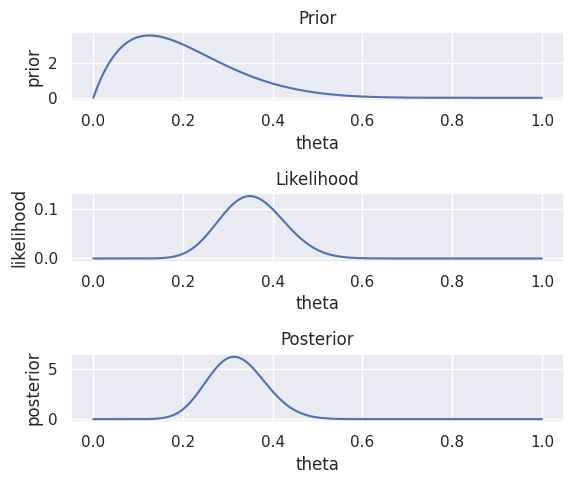

In [26]:
fig = plot_3_4(df_3_4_a)

In [27]:
results_a = summarise_binom_beta(a, b, y, n, print_results=True)

Posterior Distributiion:
 	 beta(17, 36)
Posterior Mean:
 	 0.32075471698113206
Posterior Variance:
 	 0.004034650528064555
Posterior Mode:
 	 0.3137254901960784
95% Credible Interval:
 	 (0.2032977878191033, 0.4510239822166316)


### b

In [28]:
# 事前分布のパラメータ
a, b = 8, 2

df_3_4_b = construct_df_3_4(a=a, b=b, y=y, n=n)
df_3_4_b.head()

,theta,prior,likelihood,posterior
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.005025,5.796597e-15,4.329615e-24,1.866924e-35
2,0.010050,7.382171e-13,1.231199e-19,6.761087e-29
3,0.015075,1.254910e-11,4.675335e-17,4.364452e-25
4,0.020101,9.353248e-11,3.031747e-15,2.109403e-22


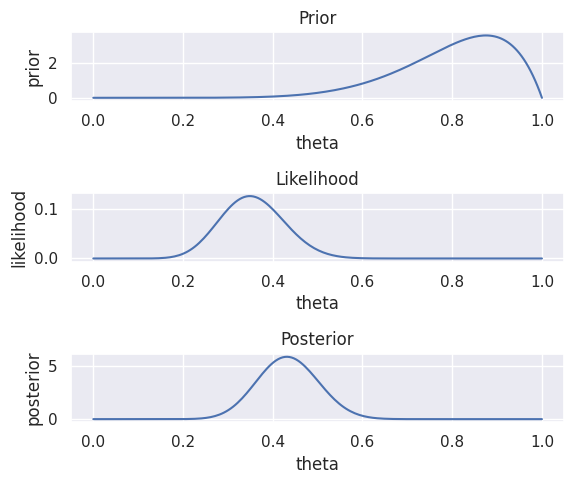

In [29]:
fig = plot_3_4(df_3_4_b)

In [30]:
results_b = summarise_binom_beta(a, b, y, n, print_results=True)

Posterior Distributiion:
 	 beta(23, 30)
Posterior Mean:
 	 0.4339622641509434
Posterior Variance:
 	 0.0045488706934061155
Posterior Mode:
 	 0.43137254901960786
95% Credible Interval:
 	 (0.30469562471174694, 0.567952795996458)


### c

In [31]:
df_3_4_c = df_3_4_a[["theta", "prior"]].copy()
df_3_4_c.rename(columns={"prior": "prior_a"}, inplace=True)

df_3_4_c["prior_b"] = df_3_4_b["prior"]

df_3_4_c["prior_c"] = (3 / 4) * df_3_4_a["prior"] + (1 / 4) * df_3_4_b["prior"]

df_3_4_c.head()

,theta,prior_a,prior_b,prior_c
0,0.000000,0.000000,0.000000e+00,0.000000
1,0.005025,0.349272,5.796597e-15,0.261954
2,0.010050,0.674220,7.382171e-13,0.505665
3,0.015075,0.975937,1.254910e-11,0.731953
4,0.020101,1.255481,9.353248e-11,0.941611


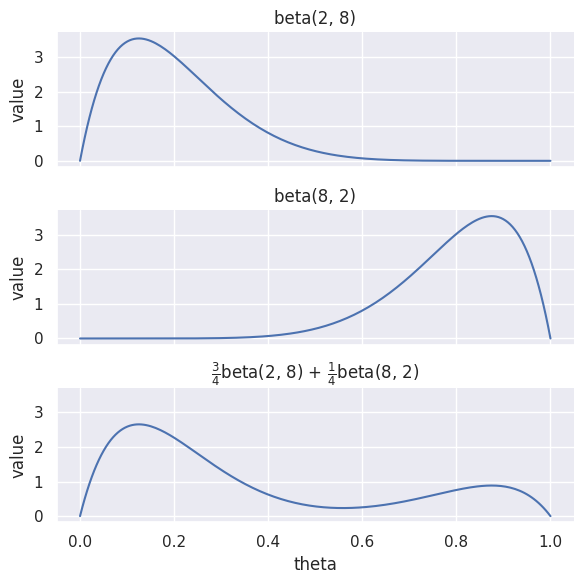

In [32]:
g = sns.relplot(
    df_3_4_c.melt(id_vars="theta"),
    x="theta",
    y="value",
    row="variable",
    kind="line",
    height=2,
    aspect=3,
)
# タイトルを編集
axes = g.axes.ravel()
titles = [
    "beta(2, 8)",
    "beta(8, 2)",
    r"$\frac{3}{4}$beta(2, 8) + $\frac{1}{4}$beta(8, 2)",
]
_ = [ax.set(title=title) for ax, title in zip(axes, titles)]

cの事前分布は $\theta \approx 0.1$ に大きいピークと $\theta \approx 0.9$ に小さいピークを持つ。  
これは、投獄から解放された人が75%ほどの再犯率の低いグループと25%ほどの再犯率の高いグループから構成されるという事前情報を表している。

### d

#### i

$$
\begin{aligned}
p(\theta) \times p(y | \theta)
&= \frac{1}{4} 
\frac{\Gamma(10)}{\Gamma(2)\Gamma(8)}
[3\theta(1 - \theta)^{7} + \theta^{7}(1 - \theta)]
\times
\binom{n}{y}
\theta^{y}(1 - \theta)^{n - y}
\\
&= 
\frac{\Gamma(10)}{\Gamma(2)\Gamma(8)}
\binom{n}{y}
\times
\left[
\frac{3}{4} \theta^{y + 1} (1 - \theta)^{n - y + 7}
+ \frac{1}{4} \theta^{y + 7} (1 - \theta)^{n - y + 1}
\right]
\\
&=
\left[
3 \theta^{y + 1} (1 - \theta)^{n - y + 7}
+ \theta^{y + 7} (1 - \theta)^{n - y + 1}
\right] \times const.
\\
&=
\left[
3 \theta^{16} (1 - \theta)^{35}
+ \theta^{22} (1 - \theta)^{29}
\right] \times const.
\end{aligned}
$$



#### ii

事後分布は
$ p(\theta | y) \propto p(\theta) \times p(y | \theta) $
であることと、 $\int d\theta ~ p(\theta | y) = 1$ であることから計算できる。

まず、正規化定数を計算する。

$$
\begin{aligned}
1 &= \int d\theta ~ p(\theta | y) \\
&= 
\int d\theta ~ 
\left[
3 \theta^{16} (1 - \theta)^{35}
+ \theta^{22} (1 - \theta)^{29}
\right] \times const.
\\
&=
\left[
 3 B(17, 36) + B(23, 30)
\right] \times const.
\end{aligned}
$$
この計算から
$$
const. = \frac{1}{3 B(17, 36) + B(23, 30)}
$$
となる。

以上の結果から、事後分布は次のようになる。
$$
\begin{aligned}
p(\theta | y) &= 
\frac{1}{3 B(17, 36) + B(23, 30)} 
\left[
3 \theta^{16} (1 - \theta)^{35}
+ \theta^{22} (1 - \theta)^{29}
\right]
\\
&= 
\frac{3 B(17, 36)}{3 B(17, 36) + B(23, 30)} 
\frac{1}{B(17, 36)}
\theta^{16} (1 - \theta)^{35}
\\
&\quad +
\frac{B(23, 30)}{3 B(17, 36) + B(23, 30)} 
\frac{1}{B(23, 30)}
\theta^{22} (1 - \theta)^{29}
\\
&= 
\frac{3 B(17, 36)}{3 B(17, 36) + B(23, 30)} 
\times
dbeta(\theta, 17, 36)
\\
&\quad +
\frac{B(23, 30)}{3 B(17, 36) + B(23, 30)} 
\times
dbeta(\theta, 23, 30)
\end{aligned}
$$


#### iii


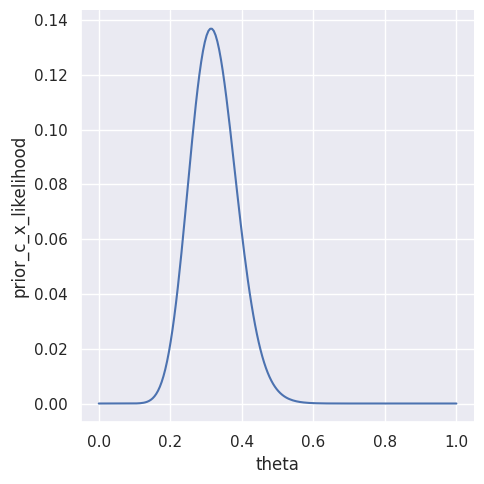

In [33]:
df_3_4_c["prior_c_x_likelihood"] = df_3_4_c["prior_c"] * df_3_4_a["likelihood"]

_ = sns.relplot(
    df_3_4_c,
    x="theta",
    y="prior_c_x_likelihood",
    kind="line",
)

In [34]:
# 事後モード
(ind,) = signal.argrelmax(df_3_4_c["prior_c_x_likelihood"].values)
posterior_mode = df_3_4_c.loc[ind, ["theta", "prior_c_x_likelihood"]].to_dict(
    orient="records"
)[0]
posterior_mode

{'theta': 0.3165829145728643, 'prior_c_x_likelihood': 0.13681439196814513}

In [35]:
def beta_mode(a, b):
    return (a - 1) / (a + b - 2)

In [36]:
results_a["posterior_mode"] = beta_mode(
    results_a["a_posterior"],
    results_a["b_posterior"],
)
results_b["posterior_mode"] = beta_mode(
    results_b["a_posterior"],
    results_b["b_posterior"],
)
print("aの結果")
display(results_a)
print("bの結果")
display(results_b)

aの結果


{'a_posterior': 17,
 'b_posterior': 36,
 'posterior_mean': 0.32075471698113206,
 'posterior_var': 0.004034650528064555,
 'posterior_std': 0.0635188989834093,
 'posterior_mode': 0.3137254901960784,
 'credible_interval': (0.2032977878191033, 0.4510239822166316)}

bの結果


{'a_posterior': 23,
 'b_posterior': 30,
 'posterior_mean': 0.4339622641509434,
 'posterior_var': 0.0045488706934061155,
 'posterior_std': 0.06744531631926798,
 'posterior_mode': 0.43137254901960786,
 'credible_interval': (0.30469562471174694, 0.567952795996458)}

In [37]:
df_3_4_d = pd.DataFrame(
    index=["a", "b", "c"],
    data={
        "prior": [
            "beta(2, 8)",
            "beta(8, 2)",
            r"$\frac{3}{4}$ beta(2, 8) + $\frac{1}{4}$ beta(8, 2)",
        ],
        "posterior_mode": [
            results_a["posterior_mode"],
            results_b["posterior_mode"],
            posterior_mode["theta"],
        ],
    },
)
Markdown(df_3_4_d.to_markdown())

|    | prior                                               |   posterior_mode |
|:---|:----------------------------------------------------|-----------------:|
| a  | beta(2, 8)                                          |         0.313725 |
| b  | beta(8, 2)                                          |         0.431373 |
| c  | $\frac{3}{4}$ beta(2, 8) + $\frac{1}{4}$ beta(8, 2) |         0.316583 |

上記の結果から事後モードは

$$
a \lesssim c < b
$$

### e

以下の事前分布を考える

$$
\begin{aligned}
p(\theta) 
&= \sum _{i=1}^{k} w_{i} \times dbeta(\theta, a_{i}, b_{i})
\\
& \quad where \quad 
\sum _{i=1}^{k} w_{i} = 1
\end{aligned}
$$

このとき、 d) ii.と同様の計算から事後分布は

$$
\begin{aligned}
p(\theta | y) &= 
\sum _{i=1}^{k}
\tilde{w}_{i}
\times
dbeta(\theta, a_{i} + y, b_{i} + n - y)
\end{aligned}
$$

となる。
ここで、 $\tilde{w}_{i}$ は事後分布の重みで、

$$
\tilde{w}_{i} = 
\frac{w_{i} B(a_{i} + y, b_{i} + n - y) / B(a_{i}, b_{i})}{\sum_{j=1}^{k} w_{j} B(a_{j} + y, b_{j} + n - y) / B(a_{j}, b_{j})} 
$$

である。 ベータ関数の対称性($B(a, b) = B(b, a)$)から、$a + b$ が一定のとき $\tilde{w}_{i}$ の $B(a_{i}, b_{i})$ の部分は分母分子でキャンセルする。(d.ii.で計算したパターン)

以上の結果から、事前分布で $w_{i} \times dbeta(a_{i}, b_{i})$ に対応する事後分布の成分は、 $w_{i} B(a_{i} + y, b_{i} + n - y) / B(a_{i} , b_{i})$ に比例する大きさの重みをもつ。
これは以下のように解釈することができる。

- **解釈1**: 事前分布で重視されている成分は事後分布でも重視される
    - 事後分布も事前分布の重み $w_{i}$ に比例するため
- **解釈2**: 信念が強い事前分布ほど重視する
    - $a_{i} + b_{i}$ が大きいほど $1/B(a_{i}, b_{i})$ が大きくなるため (下記ベータ関数のプロット参照)
    - $a_{i} + b_{i}$ が事前のサンプルサイズに対応することに注意
- **解釈3**: 極端な値をとる事前分布ほど重視する
    - $a_{i} + b_{i}$ が一定のとき、分子の $B(a_{i} + y, b_{i} + n - y)$ で差がつく
    - さらに$a + b$ が一定のとき、 $B(a, b)$ は $|a - b|$ が大きいほど(事前平均が極端な値をとるほど)大きくなる(下記ベータ関数のプロット参照)

### 参考: ベータ関数のプロット

ベータ関数をプロットしてみる

In [38]:
def plot_beta_func(a_b_range: tuple):
    a_mesh, b_mesh = np.meshgrid(
        np.linspace(*a_b_range, 50),
        np.linspace(*a_b_range, 50),
    )

    df_beta_func = pd.DataFrame({"a": a_mesh.ravel(), "b": b_mesh.ravel()})
    df_beta_func["beta"] = special.beta(
        df_beta_func["a"].values,
        df_beta_func["b"].values,
    )

    contourplot(df_beta_func, x="a", y="b", z="beta")

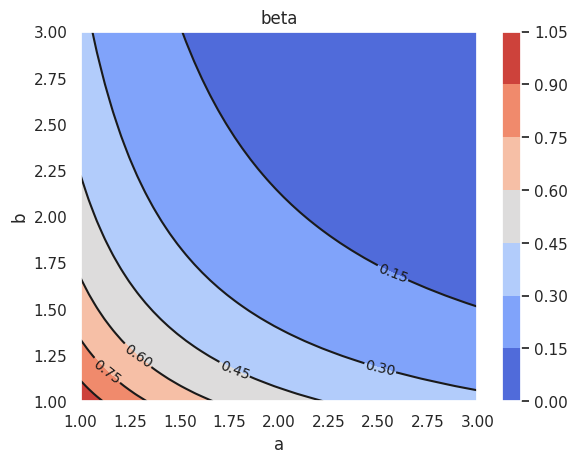

In [39]:
plot_beta_func((1, 3))

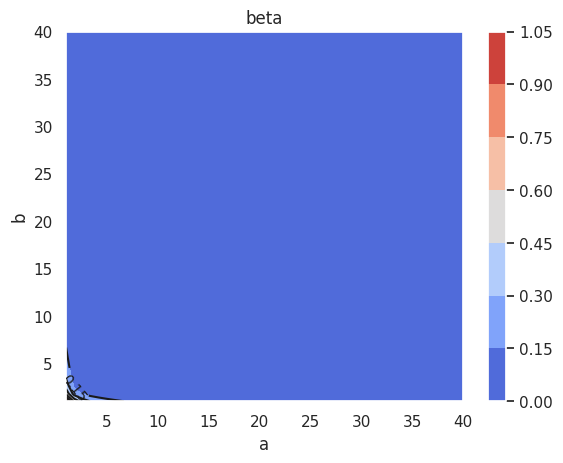

In [40]:
plot_beta_func((1, 40))

## 3.7 事後予測

### a

In [41]:
# 先行実験の結果
n1 = 15
y1 = 2

# 事前分布のパラメータ
a = 1
b = 1

# thetaの事後分布
results_3_7_a = summarise_binom_beta(a=a, b=b, y=y1, n=n1, print_results=True)

Posterior Distributiion:
 	 beta(3, 14)
Posterior Mean:
 	 0.17647058823529413
Posterior Variance:
 	 0.008073817762399077
Posterior Mode:
 	 0.13333333333333333
95% Credible Interval:
 	 (0.0404737339059459, 0.38347623684926346)


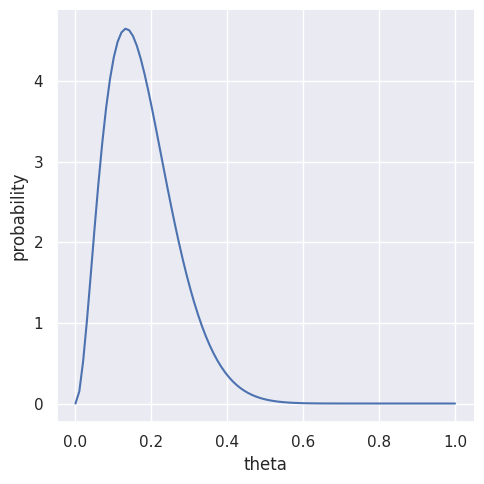

In [42]:
def plot_3_7_a():
    theta = np.linspace(0, 1, 100)
    df = pd.DataFrame(
        {
            "theta": theta,
            "probability": stats.beta.pdf(
                theta, a=results_3_7_a["a_posterior"], b=results_3_7_a["b_posterior"]
            ),
        }
    )
    sns.relplot(
        df,
        x="theta",
        y="probability",
        kind="line",
    )


plot_3_7_a()

### b

In [43]:
# 特別教育クラスの子供の数
n2 = 278

#### i.

条件付き確率 $Pr(Y_2 = y_2 | Y_1 = y_1)$ は一般に

$$
Pr(Y_2 = y2 | Y_1 = y_1)
=
\int^{1}_{0} Pr(Y_{2} = y_{2} |Y_1 = y_1, \theta ) p(\theta|Y_1=2) d\theta
$$

と書ける。よって、
等式

$$
Pr(Y_2 = y2 | Y_1 = 2)
=
\int^{1}_{0} Pr(Y_{2} = y_{2} | \theta ) p(\theta|Y_1=2) d\theta
$$

が成り立つためには、

$$
Pr(Y_{2} = y_{2} |Y_1 = y_1, \theta )
=
Pr(Y_{2} = y_{2} | \theta ) 
\\
\Leftrightarrow
Pr(Y_{2} = y_{2} ,Y_1 = y_1| \theta )
=
Pr(Y_{2} = y_{2} | \theta )
Pr(Y_{1} = y_{1} | \theta )
$$

つまり、$\theta$ で条件付けたときに $Y_1, Y_2$ が条件付き独立であることが必要となる。

#### ii. , iii.

それぞれの分布関するは以下のようになる。

$$
\begin{aligned}
Pr(Y_2 = y_2 | \theta) &= dbinom(y_2, n=n_2, p=\theta) \\
&= \binom{n_2}{y_2} \theta ^{y_2} (1 - \theta) ^{n_2 - y_2} \\
p(\theta | Y_1 = 2) &= dbeta(\theta, a=y_1 + 1, b=n_1 - y_1 + 1) \\
&= dbeta(\theta, a=3, b=14) \\
&= \frac{1}{B(3, 14)} \theta ^{2} (1 - \theta)^{13}
\end{aligned}
$$

これより、積分を実行する。

$$
\begin{aligned}
Pr(Y_2 = y2 | Y_1 = 2)
&= \int^{1}_{0} Pr(Y_{2} = y_{2} | \theta ) p(\theta|Y_1=2) d\theta \\
&= \binom{n_2}{y_2} \frac{1}{B(3, 14)} \int^{1}_{0} \theta ^{y_2 + 3 - 1} (1-\theta)^{n_2 - y_2 + 14 -1} d\theta \\
&= \binom{n_2}{y_2} \frac{B(y_2 + 3, n_2 - y_2 + 14)}{B(3, 14)}
\end{aligned}
$$

この計算が合っているかを確認する。

In [44]:
def pmf_y2_3_7(y2, n2=278):
    return (
        special.binom(n2, y2) * special.beta(y2 + 3, n2 - y2 + 14) / special.beta(3, 14)
    )

In [45]:
df_3_7_b = pd.DataFrame()
df_3_7_b["y2"] = np.arange(1, 278 + 1)
df_3_7_b["proba"] = df_3_7_b["y2"].apply(pmf_y2_3_7)

display(df_3_7_b.iloc[np.hstack([np.arange(5), np.arange(5) - 5])])

# 確率の和がほぼ1になっているか確認
df_3_7_b[["proba"]].sum()

,y2,proba
0,1,3.828376e-04
1,2,7.313517e-04
2,3,1.164089e-03
3,4,1.667315e-03
4,5,2.228509e-03
273,274,9.189968e-19
274,275,2.178071e-19
275,276,4.113477e-20
276,277,5.524237e-21
277,278,3.974271e-22


proba    0.999866
dtype: float64

確率の和がほぼ1になっているのでたぶん大丈夫

### c

TBW

### d

TBW

## 3.8 コイン

TBW

## 3.9 Galenshore分布

Galenshore($a, \theta$)

$$
p(y) 
= \frac{2}{\Gamma(a)}
\theta ^{2a} y^{2a-1} e^{-\theta^2 y^2}
$$

### a

Galenshore分布の密度関数
$p(y)$ は指数型分布族の形 $\kappa(n_0, t_0) c(\phi)^{n_0} e^{n_0 t_0 \phi}$ で書くことができる。

$$
\begin{aligned}
h(y) &=\frac{2 y^{2a - 1}}{\Gamma{a}} \\
c(\phi) &= \theta^{2a} \\
t(y) &= y^2 \\
\phi &= - \theta^2
\end{aligned}
$$

本文p.58から、この事前分布は

$$
\begin{aligned}
p(\theta | n_0, t_0)
&= \kappa(n_0, t_0) \theta^{2a n_0} e^{- n_0 t_0 \theta^2}
\\
&= \frac{2}{\Gamma(a n_0 + 1/2)} (n_0 t_0)^{a} \theta^{2a n_0} e^{- n_0 t_0 \theta^2}
\end{aligned}
$$

となることがわかり、これはGalenshore分布 $\text{Galenshore} (a n_0 + 1/2, \sqrt{n_0 t_0})$である。

いくつかのパラメータでGalenshore分布をプロットしてみる

In [46]:
# Galenshore分布の確率密度関数


@np.vectorize
def pdf_galenshore(y, a, theta):
    return (
        (2 / special.gamma(a))
        * (theta ** (2 * a))
        * (y ** (2 * a - 1))
        * np.exp(-(theta**2) * (y**2))
    )

In [47]:
params = [
    # (a, theta)
    (1, 1),
    (1, 2),
    (2, 1),
    (2, 2),
]

df_3_9 = pd.DataFrame()
df_3_9["theta"] = np.linspace(0, 4, 100)
for a, theta in params:
    df_3_9[f"a = {a}, theta = {theta}"] = pdf_galenshore(df_3_9["theta"], a, theta)

df_3_9.head()

,theta,"a = 1, theta = 1","a = 1, theta = 2","a = 2, theta = 1","a = 2, theta = 2"
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.040404,0.080676,0.321129,0.000132,0.002097
2,0.080808,0.160564,0.629798,0.001048,0.016450
3,0.121212,0.238888,0.914351,0.003510,0.053736
4,0.161616,0.314899,1.164662,0.008225,0.121683


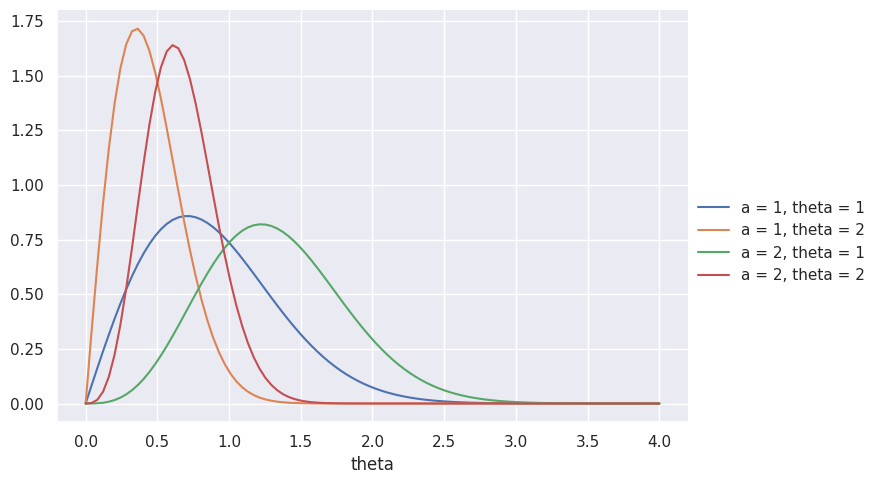

In [48]:
_ = sns.relplot(
    df_3_9.set_index("theta"),
    kind="line",
    dashes=False,
    aspect=1.5,
)

### b

本文p.53から、事後分布は $\text{Galenshore}(a(n_0 + n) + 1/2, \sqrt{n_0 t_0 + n \bar{t}})$
であり、確率密度関数は

$$
\begin{aligned}
p(\theta | y_1, \cdots, y_n)
&= p(\theta | n_0 + n, (n_0 t_0 + n \bar{t})/(n_0 + n)) \\
&= \frac{2}{\Gamma(a (n_0 + n) + 1/2)} (n_0 t_0 + n \bar{t})^{a} \theta^{2a (n_0 + n)} e^{- (n_0 t_0 + n \bar{t}) \theta^2}
\\ \\
& \qquad \text{where} \quad \bar{t} = \sum _i y^{2} _{i}
\end{aligned}
$$

となる。

### c

比を計算する。

$$
\begin{aligned}
p(\theta _a | y_1, \cdots, y_n) / p(\theta _b | y_1, \cdots, y_n)
&= \frac{
    \theta^{2a(n_0 + n)}_{a} e^{-(n_0 t_0 + n \bar{t}) \theta^{2}_{a}}
}{
    \theta^{2a(n_0 + n)}_{b} e^{-(n_0 t_0 + n \bar{t}) \theta^{2}_{b}}
} \\
&= \left( 
    \frac{\theta_{a}}{\theta_{b}}
\right) ^{2a(n_0 + n)}
\exp\left\{{-(n_0 t_0 + n \bar{t}) (\theta^{2}_{a}-\theta^{2}_{b}) }
\right\}
\end{aligned}
$$

これは $n\bar{t} = \sum_{i} y^{2}_{i}$ の関数であるから、十分統計量は $\sum_{i} y^{2}_{i}$ である。

### d

$\theta$ の事後分布は $\text{Galenshore}(a(n_0 + n) + 1/2, \sqrt{n_0 t_0 + n \bar{t}})$
であるから、

$$
E[\theta|y_1, \cdots, y_n]
= \frac{
    \Gamma \left( a(n_0 + n) + 1\right)
}{
    \Gamma \left( a(n_0 + n) + 1/2 \right)
    \sqrt{n_0 t_0 + n \bar{t}}
}
$$

となる。